In [ ]:
'''  Mehmet Muhammet ŞEN
     150255029
     İ.Ö '''

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score

from sklearn.metrics import classification_report, RocCurveDisplay, plot_roc_curve, confusion_matrix

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data2.xlsx")

In [ ]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
yData=data['Class']

In [ ]:
data = pd.get_dummies(data, columns=['Class'])
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.003564,0.909851,0.998430,0,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0,0,0,1,0,0,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0,0,0,1,0,0,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0,0,0,1,0,0,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,...,0.001852,0.668237,0.995222,0,0,0,1,0,0,0


In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class_BARBUNYA', 'Class_BOMBAY',
       'Class_CALI', 'Class_DERMASON', 'Class_HOROZ', 'Class_SEKER',
       'Class_SIRA'],
      dtype='object')

In [ ]:
x = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']]
y = data[['Class_BARBUNYA', 'Class_BOMBAY', 'Class_CALI',
       'Class_DERMASON', 'Class_HOROZ', 'Class_SEKER', 'Class_SIRA']]

In [ ]:
y 

,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
13606,0,0,0,1,0,0,0
13607,0,0,0,1,0,0,0
13608,0,0,0,1,0,0,0
13609,0,0,0,1,0,0,0


In [ ]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42,stratify =yData)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_val= sc.transform(x_val)

In [ ]:
x.shape

(13611, 16)

In [ ]:
x.shape[1]

16

In [ ]:
y.shape

(13611, 7)

In [ ]:
y.shape[1]

7

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               4352      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 139,527
Trainable params: 139,527
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.75,min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Epoch 1/200
307/307 [==============================] - 2s 6ms/step - loss: 0.3334 - accuracy: 0.8882 - val_loss: 0.2229 - val_accuracy: 0.9320 - lr: 0.0010
Epoch 2/200
307/307 [==============================] - 2s 5ms/step - loss: 0.2301 - accuracy: 0.9132 - val_loss: 0.2374 - val_accuracy: 0.9155 - lr: 0.0010
Epoch 3/200
307/307 [==============================] - 2s 5ms/step - loss: 0.2118 - accuracy: 0.9233 - val_loss: 0.1982 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 4/200
307/307 [==============================] - 2s 5ms/step - loss: 0.2061 - accuracy: 0.9235 - val_loss: 0.1996 - val_accuracy: 0.9311 - lr: 0.0010
Epoch 5/200
307/307 [==============================] - 2s 5ms/step - loss: 0.2000 - accuracy: 0.9286 - val_loss: 0.2071 - val_accuracy: 0.9275 - lr: 0.0010
Epoch 6/200
307/307 [==============================] - 1s 5ms/step - loss: 0.1966 - accuracy: 0.9281 - val_loss: 0.2139 - val_accuracy: 0.9284 - lr: 0.0010
Epoch 7/200
307/307 [==============================] - 1s 5ms/st

In [ ]:

scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_val,y_val)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

341/341 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9654
Training Accuracy: 96.54%

86/86 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9210
Testing Accuracy: 92.10%



In [ ]:
y_pred = np.argmax(model.predict(x_val), axis=-1)
y_pred 

array([3, 1, 6, ..., 4, 2, 3])

In [ ]:
y_val

,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
12803,0,0,0,1,0,0,0
3713,0,1,0,0,0,0,0
8974,0,0,0,0,0,0,1
1743,0,0,0,0,0,1,0
2303,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9990,0,0,0,0,0,0,1
227,0,0,0,0,0,1,0
7264,0,0,0,0,1,0,0
4736,0,0,1,0,0,0,0


In [ ]:
np.argmax(model.predict(x_val), axis=-1)[10]

3

In [ ]:
y_val.iloc[10]

Class_BARBUNYA    0
Class_BOMBAY      0
Class_CALI        0
Class_DERMASON    1
Class_HOROZ       0
Class_SEKER       0
Class_SIRA        0
Name: 11008, dtype: uint8

In [ ]:
model.evaluate(x_val, y_val)

86/86 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9210


[0.23614703118801117, 0.9210429787635803]

In [ ]:
y_pred

array([3, 1, 6, ..., 4, 2, 3])

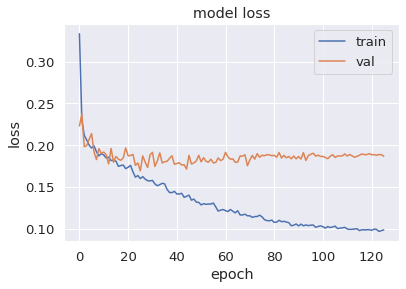

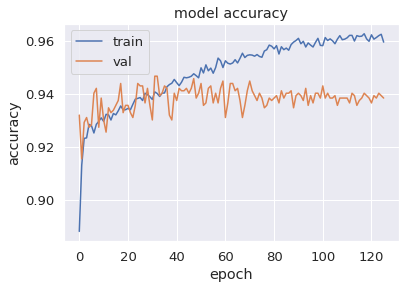

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#accuracy skoru alındı

pred=model.predict(x_val)

score=accuracy_score(y_val, pred.round(), normalize=False)

print(score)

2503


In [ ]:
'''#TP TN FP FN Değerleri alındı.
confusion_matrix(y_val,pred.round())
tn,fp,fn,tp=confusion_matrix(y_test,pred.round()).ravel()
(tn,fp,fn,tp)
'''
confusion_matrix(
    y_val.values.argmax(axis=1), y_pred)

array([[245,   0,  12,   1,   0,   2,   5],
       [  0, 104,   0,   0,   0,   0,   0],
       [ 10,   0, 306,   0,   6,   2,   2],
       [  0,   0,   0, 663,   2,   8,  36],
       [  5,   0,   3,   6, 364,   0,   8],
       [  3,   0,   0,   8,   0, 387,   8],
       [  6,   0,   0,  58,  10,  14, 439]])

In [ ]:
from numpy.matrixlib.defmatrix import matrix
matrix=classification_report(y_val,pred.round())
print(matrix)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       265
           1       1.00      1.00      1.00       104
           2       0.95      0.94      0.95       326
           3       0.90      0.93      0.92       709
           4       0.96      0.94      0.95       386
           5       0.94      0.95      0.95       406
           6       0.89      0.83      0.86       527

   micro avg       0.92      0.92      0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723
 samples avg       0.92      0.92      0.92      2723



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_Adamax = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

In [ ]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
history_Adadelta = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_RMSprop = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Epoch 1/200
307/307 [==============================] - 2s 6ms/step - loss: 0.0918 - accuracy: 0.9629 - val_loss: 0.2614 - val_accuracy: 0.9394 - lr: 0.0010
Epoch 2/200
307/307 [==============================] - 2s 5ms/step - loss: 0.0984 - accuracy: 0.9610 - val_loss: 0.2335 - val_accuracy: 0.9366 - lr: 0.0010
Epoch 3/200
307/307 [==============================] - 2s 5ms/step - loss: 0.1012 - accuracy: 0.9610 - val_loss: 0.2438 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 4/200
307/307 [==============================] - 2s 5ms/step - loss: 0.1021 - accuracy: 0.9610 - val_loss: 0.2565 - val_accuracy: 0.9376 - lr: 0.0010
Epoch 5/200
307/307 [==============================] - 2s 5ms/step - loss: 0.1067 - accuracy: 0.9582 - val_loss: 0.2518 - val_accuracy: 0.9376 - lr: 0.0010
Epoch 6/200
307/307 [==============================] - 2s 5ms/step - loss: 0.1032 - accuracy: 0.9602 - val_loss: 0.2623 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 7/200
307/307 [==============================] - 2s 5ms/st

In [ ]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history_Adagrad = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Epoch 1/200
307/307 [==============================] - 2s 5ms/step - loss: 0.0984 - accuracy: 0.9662 - val_loss: 0.2773 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 2/200
307/307 [==============================] - 1s 5ms/step - loss: 0.1017 - accuracy: 0.9650 - val_loss: 0.2748 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 3/200
307/307 [==============================] - 2s 8ms/step - loss: 0.1005 - accuracy: 0.9644 - val_loss: 0.2737 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 4/200
307/307 [==============================] - 2s 8ms/step - loss: 0.0992 - accuracy: 0.9639 - val_loss: 0.2716 - val_accuracy: 0.9357 - lr: 0.0010
Epoch 5/200
307/307 [==============================] - 3s 9ms/step - loss: 0.0938 - accuracy: 0.9646 - val_loss: 0.2714 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 6/200
307/307 [==============================] - 2s 7ms/step - loss: 0.0939 - accuracy: 0.9661 - val_loss: 0.2717 - val_accuracy: 0.9357 - lr: 0.0010
Epoch 7/200
307/307 [==============================] - 2s 8ms/st

In [ ]:
model.compile(optimizer='ftrl', loss='categorical_crossentropy', metrics=['accuracy'])
history_Ftrl = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

307/307 [==============================] - 2s 6ms/step - loss: 0.6872 - accuracy: 0.7147 - val_loss: 0.6762 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 164/200
307/307 [==============================] - 2s 6ms/step - loss: 0.6775 - accuracy: 0.7175 - val_loss: 0.6687 - val_accuracy: 0.7245 - lr: 0.0010
Epoch 165/200
307/307 [==============================] - 2s 6ms/step - loss: 0.6688 - accuracy: 0.7190 - val_loss: 0.6619 - val_accuracy: 0.7254 - lr: 0.0010
Epoch 166/200
307/307 [==============================] - 2s 6ms/step - loss: 0.6638 - accuracy: 0.7185 - val_loss: 0.6556 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 167/200
307/307 [==============================] - 2s 6ms/step - loss: 0.6575 - accuracy: 0.7217 - val_loss: 0.6496 - val_accuracy: 0.7309 - lr: 0.0010
Epoch 168/200
307/307 [==============================] - 2s 6ms/step - loss: 0.6508 - accuracy: 0.7218 - val_loss: 0.6442 - val_accuracy: 0.7309 - lr: 0.0010
Epoch 169/200
307/307 [==============================] - 2s 5ms/st

In [ ]:
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history_Nadam = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Epoch 1/200
307/307 [==============================] - 3s 7ms/step - loss: 0.2979 - accuracy: 0.8943 - val_loss: 0.2871 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 2/200
307/307 [==============================] - 2s 7ms/step - loss: 0.2324 - accuracy: 0.9152 - val_loss: 0.2599 - val_accuracy: 0.9073 - lr: 0.0010
Epoch 3/200
307/307 [==============================] - 2s 7ms/step - loss: 0.2234 - accuracy: 0.9198 - val_loss: 0.2687 - val_accuracy: 0.9146 - lr: 0.0010
Epoch 4/200
307/307 [==============================] - 2s 7ms/step - loss: 0.2184 - accuracy: 0.9218 - val_loss: 0.1996 - val_accuracy: 0.9320 - lr: 0.0010
Epoch 5/200
307/307 [==============================] - 2s 7ms/step - loss: 0.2118 - accuracy: 0.9227 - val_loss: 0.2071 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 6/200
307/307 [==============================] - 2s 6ms/step - loss: 0.2082 - accuracy: 0.9247 - val_loss: 0.2315 - val_accuracy: 0.9183 - lr: 0.0010
Epoch 7/200
307/307 [==============================] - 2s 7ms/st

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_SGD = model.fit(x=x_train, y=y_train, epochs=200, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Epoch 1/200
307/307 [==============================] - 2s 5ms/step - loss: 0.1115 - accuracy: 0.9566 - val_loss: 0.1893 - val_accuracy: 0.9330 - lr: 0.0100
Epoch 2/200
307/307 [==============================] - 1s 4ms/step - loss: 0.1099 - accuracy: 0.9570 - val_loss: 0.1886 - val_accuracy: 0.9357 - lr: 0.0100
Epoch 3/200
307/307 [==============================] - 1s 4ms/step - loss: 0.1113 - accuracy: 0.9546 - val_loss: 0.1889 - val_accuracy: 0.9366 - lr: 0.0100
Epoch 4/200
307/307 [==============================] - 1s 4ms/step - loss: 0.1107 - accuracy: 0.9553 - val_loss: 0.1897 - val_accuracy: 0.9348 - lr: 0.0100
Epoch 5/200
307/307 [==============================] - 1s 4ms/step - loss: 0.1139 - accuracy: 0.9554 - val_loss: 0.1900 - val_accuracy: 0.9339 - lr: 0.0100
Epoch 6/200
307/307 [==============================] - 1s 4ms/step - loss: 0.1114 - accuracy: 0.9562 - val_loss: 0.1902 - val_accuracy: 0.9348 - lr: 0.0100
Epoch 7/200
307/307 [==============================] - 1s 4ms/st

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'lower ight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


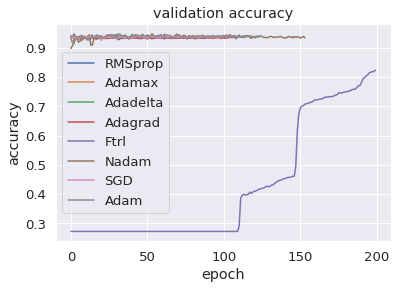

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'lower ight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


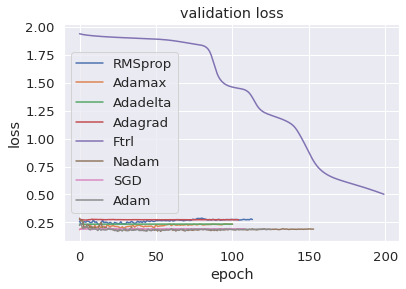

In [ ]:
# summarize history for accuracy
plt.plot(history_RMSprop.history['val_accuracy'])
plt.plot(history_Adamax.history['val_accuracy'])
plt.plot(history_Adadelta.history['val_accuracy'])
plt.plot(history_Adagrad.history['val_accuracy'])
plt.plot(history_Ftrl.history['val_accuracy'])
plt.plot(history_Nadam.history['val_accuracy'])
plt.plot(history_SGD.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','SGD','Adam'], loc='lower ight')
plt.show()

# summarize history for loss
plt.plot(history_RMSprop.history['val_loss'])
plt.plot(history_Adamax.history['val_loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.plot(history_Adagrad.history['val_loss'])
plt.plot(history_Ftrl.history['val_loss'])
plt.plot(history_Nadam.history['val_loss'])
plt.plot(history_SGD.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','SGD','Adam'], loc='lower ight')
plt.show()